In [39]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style="white")

Load the data file

                                                                                Dataset Attributes
customerID : Customer ID 
gender : Whether the customer is a male or a female
SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
Partner : Whether the customer has a partner or not (Yes, No)
Dependents : Whether the customer has dependents or not (Yes, No)
tenure : Number of months the customer has stayed with the company
PhoneService : Whether the customer has a phone service or not (Yes, No)
MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
Contract : The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges : The amount charged to the customer monthly
TotalCharges : The total amount charged to the customer
Churn : Whether the customer churned or not (Yes or No)

In [40]:
telco_data = pd.read_csv('./Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Look at the top 5 records of data

In [41]:
telco_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
telco_data.shape

(7043, 21)

In [43]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [44]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
telco_data.describe().T  #.T is transpose

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


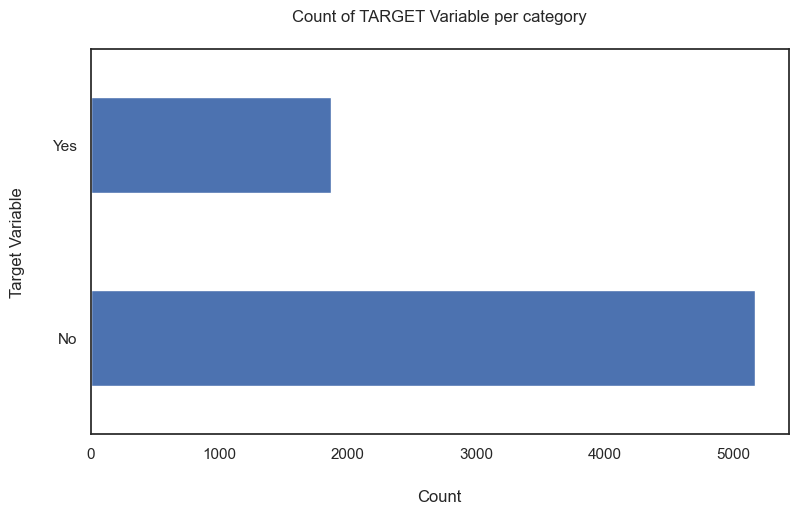

In [46]:
telco_data['Churn'].value_counts().plot(kind='barh',figsize=(9,5)) # figsize=(width,height)
plt.xlabel("Count",labelpad=20) #labelpad = specifies the padding between the axis label and the axis itself.
plt.ylabel("Target Variable",labelpad=20)
plt.title("Count of TARGET Variable per category",y=1.05);

In [47]:
telco_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [48]:
100*telco_data['Churn'].value_counts()/len(telco_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [49]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode

telco_data.info(verbose=True) # when set to True, provides a detailed output including the full summary of all columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


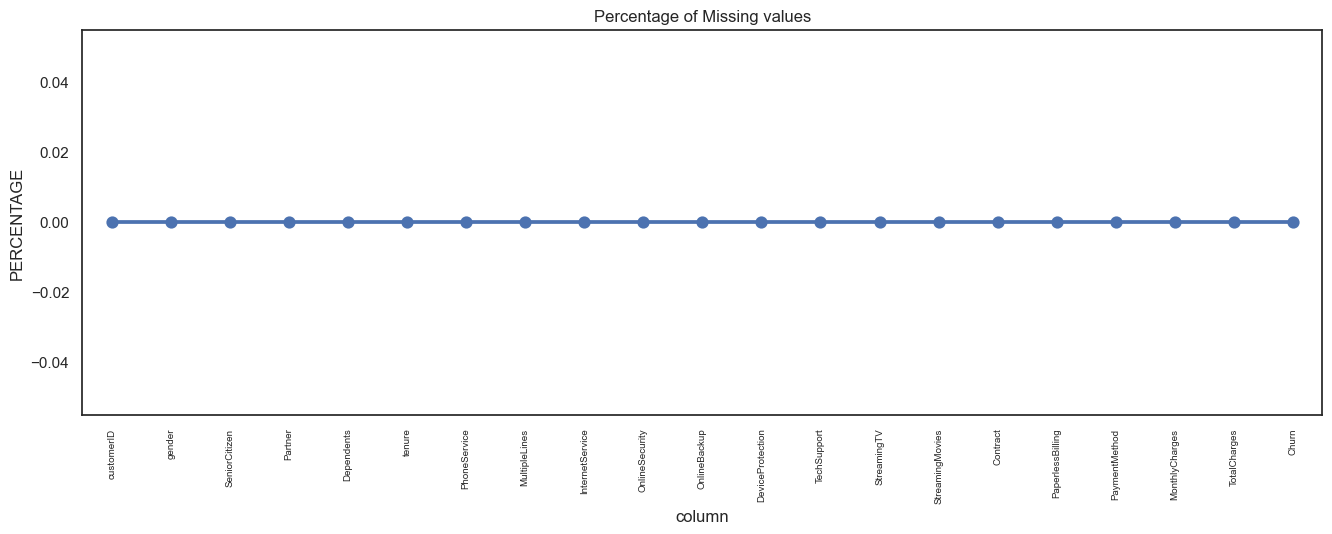

In [50]:
# Calculate the percentage of missing values for each column
missing = pd.DataFrame((telco_data.isnull().sum())*100/telco_data.shape[0]).reset_index()
missing.columns = ['column', 'percentage']
#set fig size
plt.figure(figsize=(16,5))
# create a point plot
ax = sns.pointplot(x='column', y='percentage', data=missing)
# Customize the x-axis ticks
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()



Missing Data - Initial Intuition
Here, we don't have any missing data.


General Thumb Rules:

For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

Converting "Total Charges" from Object to Numerical Values

In [51]:
telco_data["TotalCharges"] = pd.to_numeric(telco_data["TotalCharges"] , errors= "coerce")

In [52]:
telco_data["TotalCharges"] , telco_data["TotalCharges"].dtype

(0         29.85
 1       1889.50
 2        108.15
 3       1840.75
 4        151.65
          ...   
 7038    1990.50
 7039    7362.90
 7040     346.45
 7041     306.60
 7042    6844.50
 Name: TotalCharges, Length: 7043, dtype: float64,
 dtype('float64'))

In [53]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

we have a 11 missing values in the "TotalCharges" column we should drop it

In [54]:
telco_data[telco_data['TotalCharges'].isna()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
Let's see if there are any other 0 values in the tenure column.

In [55]:
telco_data[telco_data['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

There are no additional missing values in the Tenure column.
Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [56]:
telco_data.dropna(inplace=True , axis= 0)
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [57]:
telco_data.fillna(telco_data["TotalCharges"].mean())


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Turn Our Target Variable from catogrie To Numerical (Yes--1) & (No--0)

In [58]:
telco_data["Churn"].replace(to_replace="Yes", value= 1 , inplace= True)
telco_data["Churn"].replace(to_replace="No", value= 0 , inplace= True)
telco_data["Churn"].dtype

/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_73929/4070171326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  telco_data["Churn"].replace(to_replace="Yes", value= 1 , inplace= True)
/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_73929/4070171326.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we 

dtype('int64')

In [59]:
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


Encoding all Catogrical Variables

In [60]:
Data_Encoded = pd.get_dummies(telco_data)
Data_Encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


Exploratory Data Analysis

Correlation Matrix

In [61]:
# Plot
# plt.figure(figsize=(15,8))
# Data_Encoded.corr()['Churn'].sort_values(ascending = False).plot(kind='bar' , color = 'c')
# plt.title('Correlation with Churn')
# plt.xlabel('Features')
# plt.ylabel('Correlation coefficient')
# plt.show()

Demographics

In [62]:
Demogarphics =pd.DataFrame(telco_data[['gender' , 'Partner' , 'Dependents' ,'SeniorCitizen']]) 
Demogarphics.head()

,gender,Partner,Dependents,SeniorCitizen
0,Female,Yes,No,0
1,Male,No,No,0
2,Male,No,No,0
3,Male,No,No,0
4,Female,No,No,0


In [63]:
Demogarphics['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

Turning The SeniorCitizen From a Numerical Variable To Catogrical Variable

In [64]:
Demogarphics["SeniorCitizen"].replace(to_replace= 0 , value= 'No' ,inplace= True)
Demogarphics["SeniorCitizen"].replace(to_replace= 1 , value= 'Yes' , inplace=True)

/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_73929/2882380710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Demogarphics["SeniorCitizen"].replace(to_replace= 0 , value= 'No' ,inplace= True)


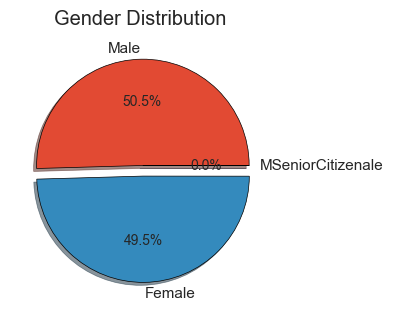

In [65]:
plt.style.use("ggplot")
plt.figure(figsize=(4 ,4))
Gender = Demogarphics['gender'].value_counts()
Gender_Keys = Gender.keys()
Gender_Values = Gender.values
explode = [0.1 if i == 1 else 0 for i in range(len(Gender_Values))]

plt.pie(x= Gender_Values , labels= Gender_Keys , explode = explode ,
        shadow=True , wedgeprops={"edgecolor":"black"} , autopct = '%1.1f%%')
plt.title('Gender Distribution ')
plt.tight_layout()
plt.show()

We Know Thay The Gender Distribution is nearly equal



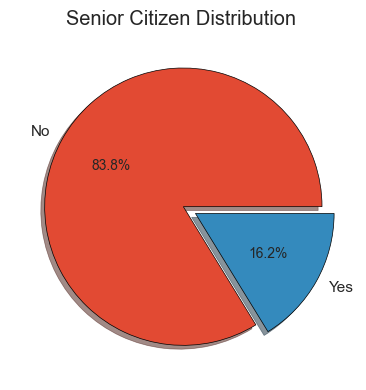

In [66]:
plt.style.use("ggplot")
plt.figure(figsize=(4 ,4))
SeniorCitizen = Demogarphics['SeniorCitizen'].value_counts()
SeniorCitizen_Keys = SeniorCitizen.keys()
SeniorCitizen_Values = SeniorCitizen.values
plt.pie(x= SeniorCitizen_Values , labels= SeniorCitizen_Keys , explode = [0,0.1] ,
        shadow=True , wedgeprops={"edgecolor":"black"} , autopct = '%1.1f%%')
plt.title('Senior Citizen Distribution ')
plt.tight_layout()
plt.show()

From This We Know That The Major of The Citizan isn't a Senior

/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_73929/3270916712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Demogarphics , x= "Partner", dodge=True , palette="plasma")


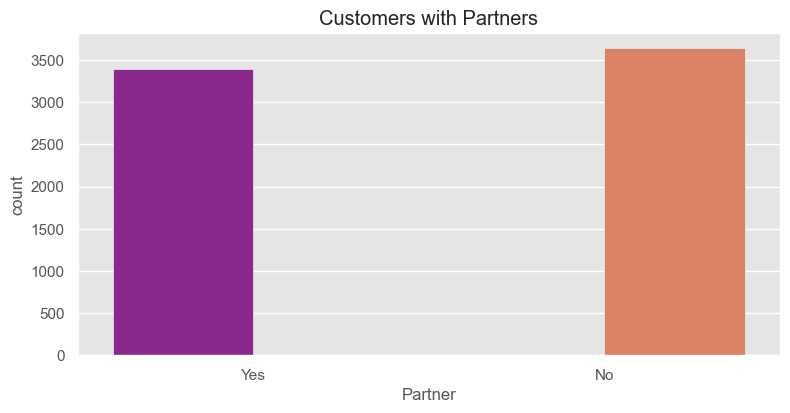

In [67]:
plt.figure(figsize=(8,4))
sns.countplot(data=Demogarphics , x= "Partner", dodge=True , palette="plasma")
plt.tight_layout()
plt.title('Customers with Partners')
plt.show()


we can consider The Count of customers with partner state is equal the count of the customer without Partner

/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_73929/4045659242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Demogarphics , x= 'Dependents' , dodge=True , palette="plasma")


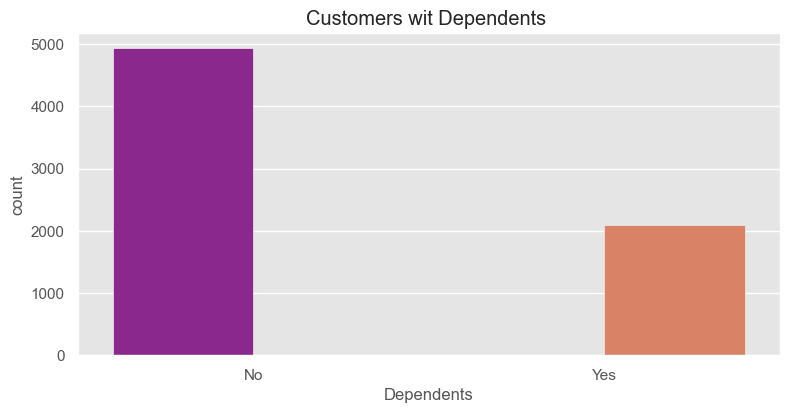

In [68]:
plt.figure(figsize=(8,4))
sns.countplot(data=Demogarphics , x= 'Dependents' , dodge=True , palette="plasma")
plt.tight_layout()
plt.title('Customers wit Dependents ')
plt.show()

The major of customers is without dependents

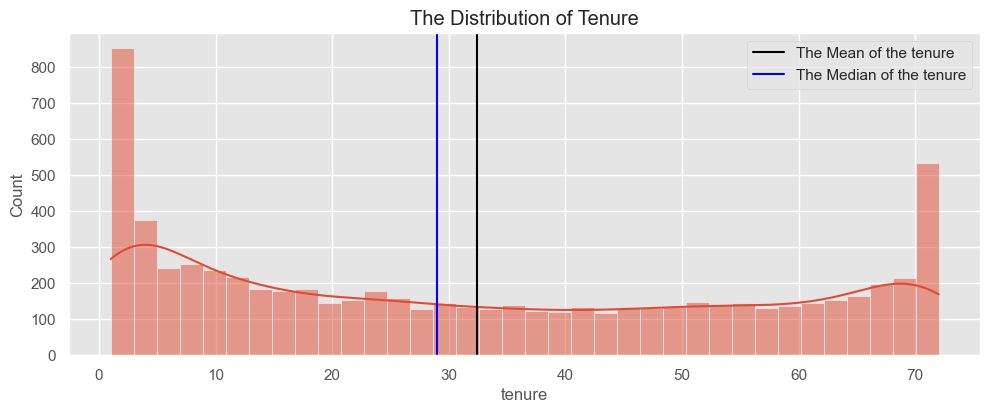

In [70]:
plt.figure(figsize=(10,4))
sns.histplot(telco_data['tenure'], kde=True , bins ="auto" ,binwidth=2 ,common_norm=True )
plt.axvline(np.mean(telco_data["tenure"]) , color = "black" , label ="The Mean of the tenure")
plt.axvline(np.median(telco_data["tenure"]) , color = "blue" , label ="The Median of the tenure")
plt.tight_layout()
plt.legend()
plt.title('The Distribution of Tenure')
plt.grid(True)
plt.show()

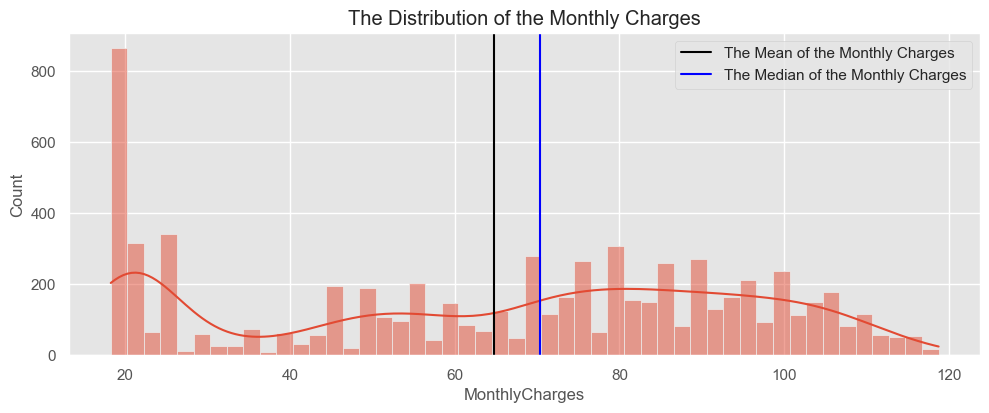

In [72]:
plt.figure(figsize=(10,4))
sns.histplot(telco_data['MonthlyCharges'], kde=True , bins ="auto" ,binwidth=2 ,common_norm=True )
plt.axvline(np.mean(telco_data['MonthlyCharges']) , color = "black" , label ="The Mean of the Monthly Charges")
plt.axvline(np.median(telco_data['MonthlyCharges']) , color = "blue" , label ="The Median of the Monthly Charges")
plt.tight_layout()
plt.legend()
plt.title('The Distribution of the Monthly Charges')
plt.grid(True)
plt.show()

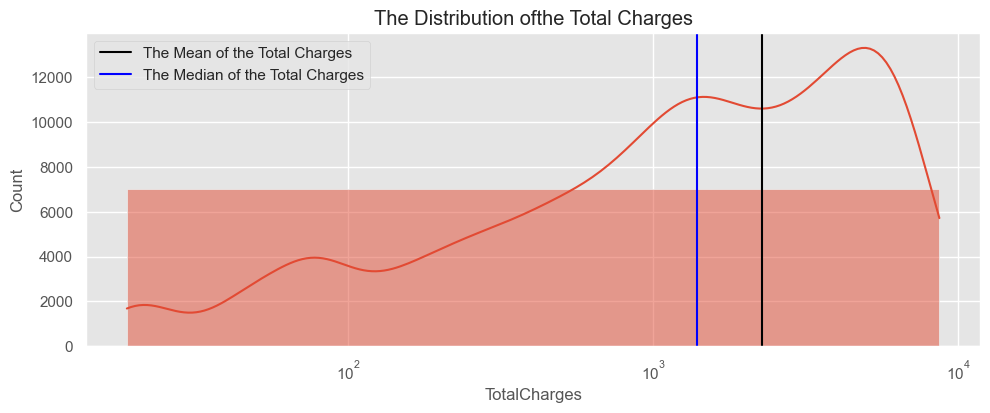

In [74]:
plt.figure(figsize=(10,4))
sns.histplot(telco_data['TotalCharges'], kde=True ,log_scale=True,  bins = 'auto' ,binwidth=2 ,common_norm=True )
plt.axvline(np.mean(telco_data['TotalCharges']) , color = "black" , label ="The Mean of the Total Charges")
plt.axvline(np.median(telco_data['TotalCharges']) , color = "blue" , label ="The Median of the Total Charges")
plt.tight_layout()
plt.legend()
plt.title('The Distribution ofthe Total Charges')
plt.grid(True)
plt.show()

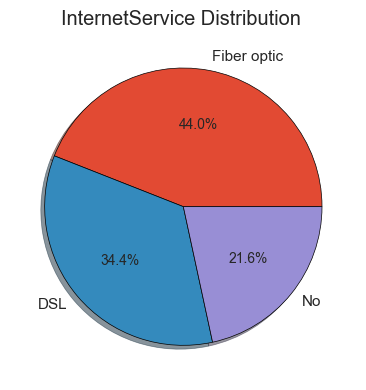

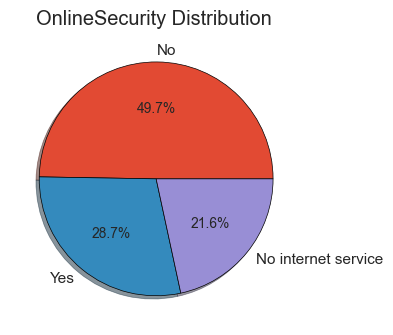

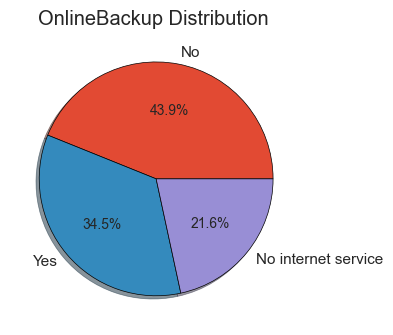

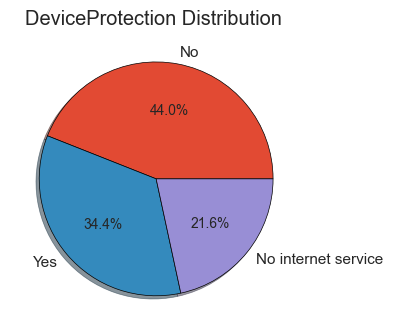

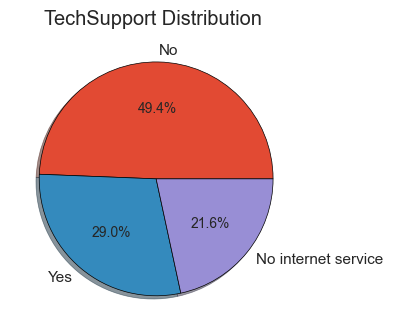

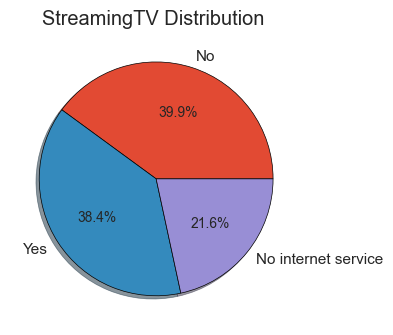

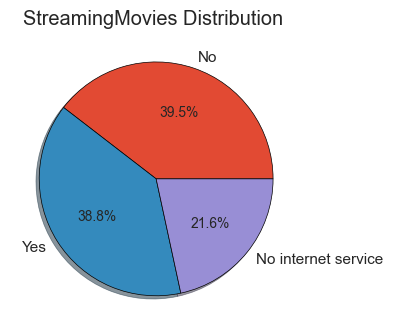

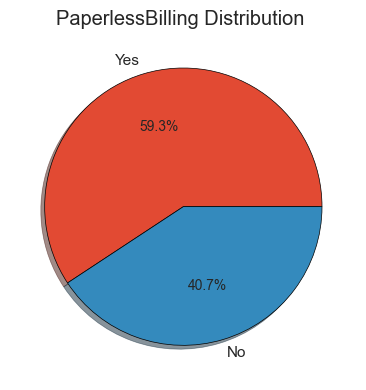

In [75]:
pieChart =['InternetService' ,'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling']
for i in pieChart:
    plt.style.use("ggplot")
    plt.figure(figsize=(4 ,4))
    Gender = telco_data[i].value_counts()
    Gender_Keys = Gender.keys()
    Gender_Values = Gender.values
    plt.pie(x= Gender_Values , labels= Gender_Keys  ,
            shadow=True , wedgeprops={"edgecolor":"black"} , autopct = '%1.1f%%')
    plt.title(f'{i} Distribution ')
    plt.tight_layout()
    plt.show()